# Project Notebook: Part 2

# Analysis of COVID19 Tweets

## Content
+ Introduction: Tweets with the hashtag #covid19
+ Data description
+ Research questions
+ Data preparation
+ Data Visualisation


## 1. Introduction: Tweets with the hashtag #covid19

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic. As of 2 October 2020, more than 34.3 million cases have been reported across 188 countries and territories with more than 1.02 million deaths; more than 23.8 million people have recovered.

Common symptoms include fever, cough, fatigue, shortness of breath or breathing difficulties, and loss of smell and taste. While most people have mild symptoms, some people develop acute respiratory distress syndrome (ARDS) possibly precipitated by cytokine storm, multi-organ failure, septic shock, and blood clots. The incubation period may range from one to fourteen days.
There are no proven vaccines or specific treatments for COVID-19 yet, though several are in development. Management involves the treatment of symptoms, supportive care, isolation, and experimental measures. The World Health Organization (WHO) declared the COVID-19 outbreak a Public Health Emergency of International Concern (PHEIC) on 30 January 2020 and a pandemic on 11 March 2020.Local transmission of the disease has occurred in most countries across all six WHO regions.

Longer-term damage to organs (in particular lungs and heart) has been observed, and there is concern about a significant number of patients who have recovered from the acute phase of the disease but continue to experience a range of effects including severe fatigue, memory loss and other cognitive issues, low grade fever, muscle weakness, breathlessness and other symptoms for months afterwards.

Source(https://en.wikipedia.org/wiki/Coronavirus_disease_2019)

## 2. Data description

These tweets are collected using Twitter API and a Python script. A query for this high-frequency hashtag (#covid19) is run on a daily basis for a certain time period, to collect a larger number of tweets samples.

+ user_name - the name of a Twitter user
+ user_location - the geolocation where the user wrote it
+ user_description - the description of an account of the user
+ user_created - the date when the user account was created
+ user_followers - the follower of a user
+ user_friends - the friends of a user
+ user_favourites - the number of favourites of the user
+ user_verified - the verification status
+ date - the tweet date 
+ text - the text of a tweet
+ source - the source of the tweet
+ hashtags - the hashtag of a tweet


## 3. Research questions

#### Questions for project:

+ The analysis of top 10 locations with highest number of tweets
+ The analysis of top 10 sources from where maximum tweets being made
+ The analysis of top 10 Countries Posting about Covid-19 in July
+ The analysis of Verified account tweets vs Unverified account tweets
+ The analysis of User Followers and Friends 


## 4. Data preparation

### Used libraries

In [17]:
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd                         #To work with datasets

import requests

from bs4 import BeautifulSoup

## Working with dataset

The used dataset was downloaded from kaggle.com.
Url(https://www.kaggle.com/gpreda/covid19-tweets)

In [18]:
df = pd.read_csv('covid19_tweets.csv')              #To read csv file with dataset 

df                                                  #To show table

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


## Checking all columns for null values

In this section I will find rows and columns with null values

In [19]:
check = df.notnull()   #Finding null values
check.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,True,True,True,True,True,True,True,True,True,True,False,True,True
1,True,True,True,True,True,True,True,True,True,True,False,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True


In [20]:
check.all()              #Checking all columns for null

user_name            True
user_location       False
user_description    False
user_created         True
user_followers       True
user_friends         True
user_favourites      True
user_verified        True
date                 True
text                 True
hashtags            False
source              False
is_retweet           True
dtype: bool

## Checking for duplicated data

In this section I like to find rows with same data

In [21]:
duplicate = df.duplicated()
duplicate

0         False
1         False
2         False
3         False
4         False
          ...  
179103    False
179104    False
179105    False
179106    False
179107    False
Length: 179108, dtype: bool

In [22]:
duplicate[duplicate].index.values

array([], dtype=int64)


There no duplicating data in dataset

## 5. Solutions for problems

### Q1 Top 10 locations with highest number of tweets

In [23]:
location_data = df.groupby(['user_location'])[['user_name']].count() #Count the number of users in each country
top_10_locations = location_data.sort_values(by = 'user_name', ascending=False).head(10).reset_index() 
top_10_locations

,user_location,user_name
0,India,3741
1,United States,2455
2,"New Delhi, India",1721
3,"Mumbai, India",1401
4,"Washington, DC",1354
5,"London, England",1269
6,United Kingdom,1206
7,London,1103
8,"New York, NY",1082
9,Australia,964


Text(0.5, 1.0, 'Top 10 locations with most tweets')

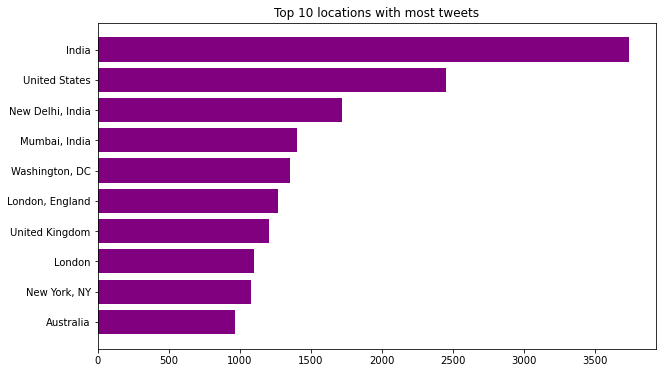

In [24]:
fig = plt.figure(figsize=(10,6))
plt.barh(data = top_10_locations.iloc[::-1], y = 'user_location', width = 'user_name', color='purple')
plt.title("Top 10 locations with most tweets")

The graph illustrates that most of the users who used #covid19 tags are from India

### Q2 Top 10 sources from where maximum tweets being made

In [25]:
source_count = df.groupby('source')[['user_name']].count()    #count the username regarding to the source
source_count = source_count.sort_values(by="user_name").tail(10).reset_index()
source_count

,source,user_name
0,IFTTT,1545
1,Instagram,1759
2,Sprout Social,1833
3,Buffer,2728
4,Twitter for iPad,4336
5,Hootsuite Inc.,7321
6,TweetDeck,8543
7,Twitter for iPhone,35472
8,Twitter for Android,40179
9,Twitter Web App,56891


Text(0.5, 1.0, 'Top 10 sources of highest tweet')

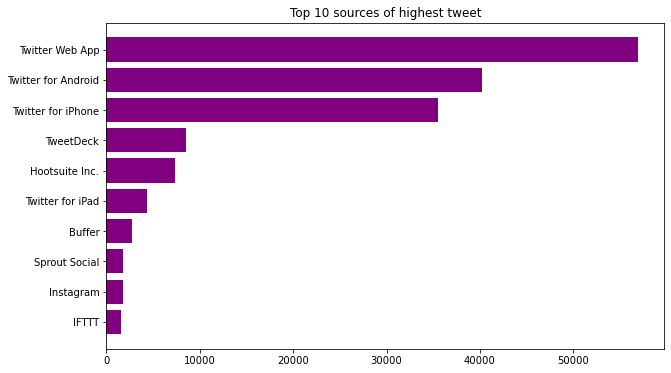

In [26]:
fig = plt.figure(figsize=(10,6))
plt.barh(data=source_count, y="source", width="user_name", color='purple')
plt.title("Top 10 sources of highest tweet")

The graph demonstrates that sources such as Twitter Web App, Twitter for Android, Twitter for iPhone are the most used ones 

### Q3 Top 10 Countries Posting about Covid-19 in July

In [27]:
df['date']=pd.to_datetime(df['date'])


In [28]:
top_july = df['user_location'][pd.DatetimeIndex(df['date']).month == 7].value_counts()

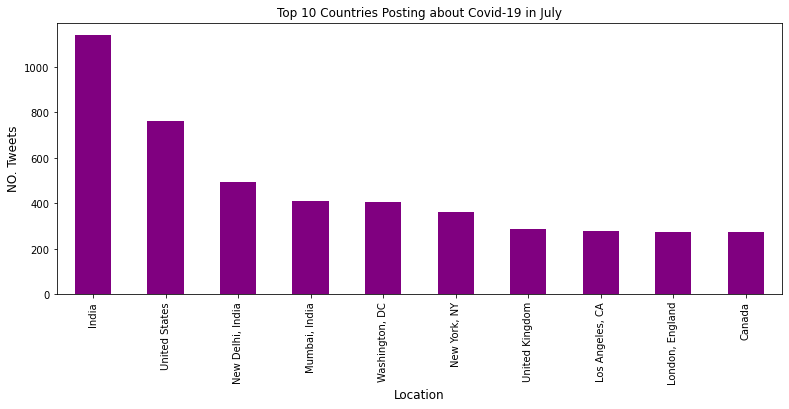

In [29]:
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
top_july[0:10].plot(kind='bar', title = "Top 10 Countries Posting about Covid-19 in July", color='purple' )

The graph shows that most of the users who used #covid19 tags in July are from India

### Q4 Verified account tweets vs Unverified account tweets

In [30]:
user_status=df['user_verified'].value_counts()  #Get the column from main dataframe, count it

([<matplotlib.axis.XTick at 0x1fb94e2fbb0>,
 [Text(0, 0, 'Unverified'), Text(0, 0, 'Verified')])

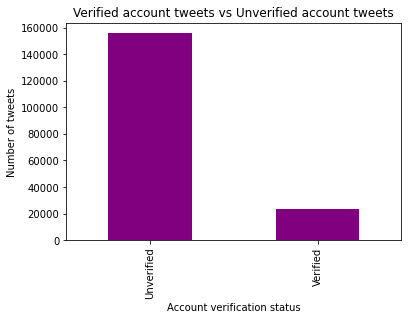

In [31]:
user_status.plot(kind='bar', color='purple')
plt.xlabel("Account verification status")
plt.ylabel("Number of tweets")
plt.title("Verified account tweets vs Unverified account tweets")
plt.xticks([False,True],['Unverified','Verified'])

To sum up, it can be seen, the amount of unverified more than verified users for approximately 7-8 times

### Q5 User Followers and Friends 

Text(0.5, 1.0, 'User Followers and Friends Scatter Plot')

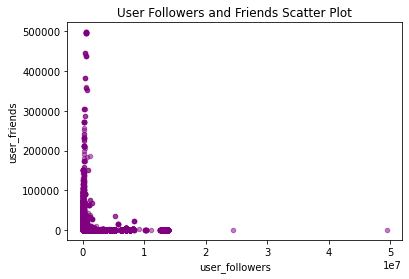

In [32]:
df.plot(kind='scatter',x = 'user_followers',y = 'user_friends',alpha =.5, color='purple')
plt.xlabel('user_followers')
plt.ylabel('user_friends')
plt.title('User Followers and Friends Scatter Plot')